In [1]:
from sklearn.datasets import make_blobs, make_moons, make_circles
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
import seaborn as sn
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.data import iris_data
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from mlxtend.evaluate import mcnemar_table

To evaluate this algorithms we will use 3 kinds of toy datasets: blobls, moons and circles. This are fictional datasets designed to emulate the behaviour of real datasets with specific distributions.

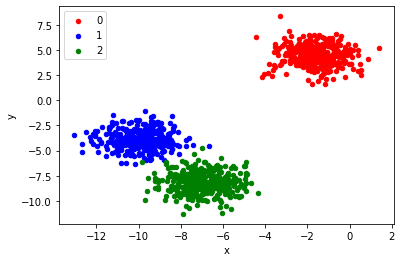

In [2]:
# generate 2d classification dataset as blobs
X_blobs, y_blobs = make_blobs(n_samples=1000, centers=3, n_features=2, random_state=1)
# scatter plot, dots colored by class value
df_blobs = DataFrame(dict(x=X_blobs[:,0], y=X_blobs[:,1], label=y_blobs))
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = plt.subplots()
grouped = df_blobs.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

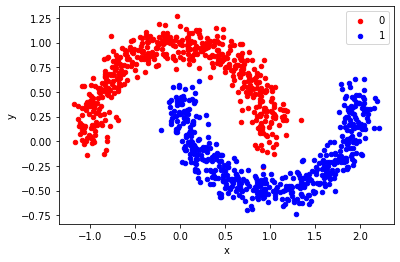

In [3]:
# generate 2d classification dataset as moons
X_moons, y_moons = make_moons(n_samples=1000, noise=0.1, random_state=0)
# scatter plot, dots colored by class value
df_moons = DataFrame(dict(x=X_moons[:,0], y=X_moons[:,1], label=y_moons))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df_moons.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

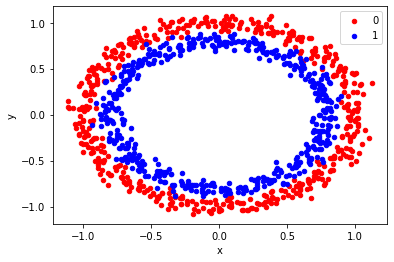

In [4]:
# generate 2d classification dataset as circles
X_circles, y_circles = make_circles(n_samples=1000, noise=0.05, random_state=0)
# scatter plot, dots colored by class value
df_circles = DataFrame(dict(x=X_circles[:,0], y=X_circles[:,1], label=y_circles))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df_circles.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

In [5]:
# Splitting the test for testing and validation
#BLOBS
X_blobs_test=X_blobs[:len(X_blobs)//4]
X_blobs_val=X_blobs[len(X_blobs)//4:]
y_blobs_test=y_blobs[:len(y_blobs)//4]
y_blobs_val=y_blobs[len(y_blobs)//4:]
#MOONS
X_moons_test=X_moons[:len(X_moons)//4]
X_moons_val=X_moons[len(X_moons)//4:]
y_moons_test=y_moons[:len(y_moons)//4]
y_moons_val=y_moons[len(y_moons)//4:]
#CIRCLES
X_circles_test=X_circles[:len(X_circles)//4]
X_circles_val=X_circles[len(X_circles)//4:]
y_circles_test=y_circles[:len(y_circles)//4]
y_circles_val=y_circles[len(y_circles)//4:]


In [6]:
# Initializing Classifiers

clf1 = SVC(kernel='linear', random_state=0, probability=True)
clf2 = SVC(kernel='rbf', random_state=0, probability=True)

clfs = [clf1, clf2]
labels = ['SVM (linear)','SVM (RBF)']

In [7]:
# Plotting Decision Regions

def plot_decision(X, y, clfs,labels):
    gs = gridspec.GridSpec(2, 2)
    fig = plt.figure(figsize=(10, 8))
    labels = labels
    data_clf_fitted=[];
    
    for clf, lab, grd in zip(clfs,
                            labels,
                            itertools.product([0, 1],
                            repeat=2)):
        clf.fit(X, y)
        data_clf_fitted.append(clf)
        ax = plt.subplot(gs[grd[0], grd[1]])
        fig = plot_decision_regions(X=X, y=y,
                                    clf=clf, legend=2)
        plt.title(lab)

    plt.show()
    return data_clf_fitted

In [8]:
def plot_confusion(X,y,classifier,title):
    title = "Confusion matrix related to "+title
    c_matrix=[];
    print(title)
    disp = plot_confusion_matrix(classifier, X, y,
                                 cmap=plt.cm.Blues,)
    disp.ax_.set_title(title)
    c_matrix.append(disp.confusion_matrix)
    #print(disp.confusion_matrix)

    plt.show()
    return c_matrix[0]

In [9]:
def plot_mcnamer_table(y_target,y_model1,y_model2):
    tb = mcnemar_table(y_target,
                       y_model1, 
                       y_model2)
   
    plt.imshow(tb, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("McNemar's Test", fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(1)
    plt.xticks(tick_marks, rotation=45)
    plt.yticks(tick_marks)
    plt.grid(False)
    thresh = tb.max() / 2.
    for i, j in itertools.product(range(tb.shape[0]), range(tb.shape[1])):
        plt.text(j, i, tb[i, j],
                 horizontalalignment="center",
                 color="white" if tb[i, j] > thresh else "black",
                 size="22")

    plt.tight_layout()
    accuracy(tb)
    chi_squared(tb)
    

In [25]:
def accuracy(tb):
    A=tb[0][0]
    B=tb[0][1]
    C=tb[1][0]
    D=tb[1][1]
    Accuracy1 = (A+B)/(A+B+C+D)*100
    print("Accuracy Model 1: " +str(Accuracy1)+" %")
    
    Accuracy2 = (A+C)/(A+B+C+D)*100
    print("Accuracy Model 2: " +str(Accuracy2)+" %")


In [26]:
def chi_squared(tb):
    A=tb[0][0]
    B=tb[0][1]
    C=tb[1][0]
    D=tb[1][1]
    
    Chi_squared = pow((abs(B-C)-1), 2)/(B+C)
    print("Chi Squared : " +str(Chi_squared))
    

Here we plot the difference between linear and RBF kernels in the case of a blob distribution. We conclude that there is not a big difference in this case, because the data can be linearly separated.

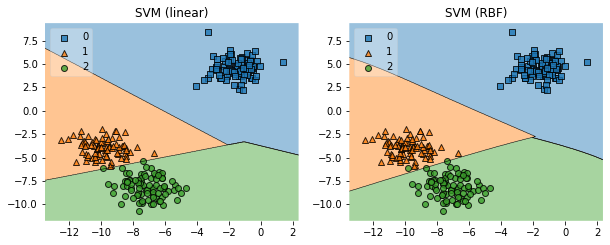

In [27]:
blobs_classifiers=plot_decision(X_blobs_test, y_blobs_test, clfs,labels)

Accuracy Model 1: 99.6 %
Accuracy Model 2: 99.86666666666667 %
Chi Squared : 0.5


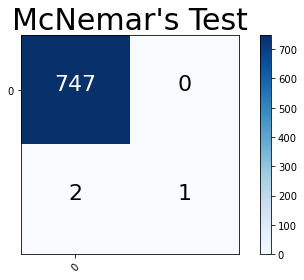

In [28]:
y_blobs_lin=blobs_classifiers[0].predict(X_blobs_val)
y_blobs_rbf=blobs_classifiers[1].predict(X_blobs_val)
plot_mcnamer_table(y_blobs_val,y_blobs_lin,y_blobs_rbf)

Here, for the moons, we start to take notice of the advantage of the RBF kernel. The linear kernel is unable to separate the two classes completly whereas the RBF can fit it perfecly.

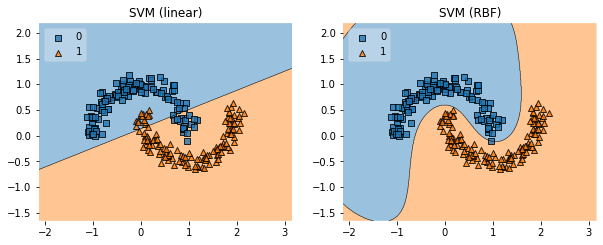

In [29]:
moons_classifiers=plot_decision(X_moons_test, y_moons_test, clfs,labels)

Accuracy Model 1: 87.06666666666666 %
Accuracy Model 2: 99.33333333333333 %
Chi Squared : 90.01086956521739


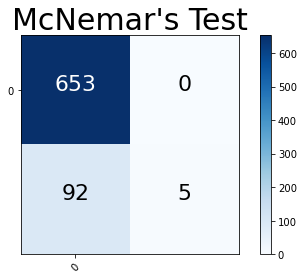

In [30]:
y_moons_lin=moons_classifiers[0].predict(X_moons_val)
y_moons_rbf=moons_classifiers[1].predict(X_moons_val)
plot_mcnamer_table(y_moons_val,y_moons_lin,y_moons_rbf)

In the case of the circular data, we can see that the linear kernel is useless, as it completly fails to distinguish between the two classes.

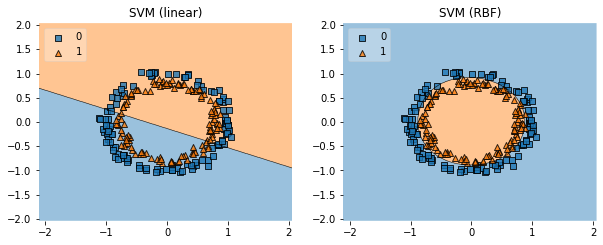

In [31]:
circles_classifiers=plot_decision(X_circles_test, y_circles_test, clfs,labels)

Accuracy Model 1: 49.333333333333336 %
Accuracy Model 2: 96.39999999999999 %
Chi Squared : 332.1823056300268


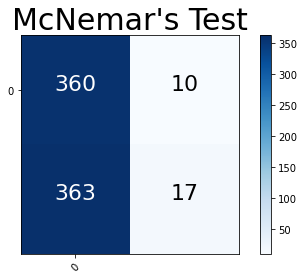

In [32]:
y_circles_lin=circles_classifiers[0].predict(X_circles_val)
y_circles_rbf=circles_classifiers[1].predict(X_circles_val)
plot_mcnamer_table(y_circles_val,y_circles_lin,y_circles_rbf)

In [33]:
# Initializing Classifiers

ppn=Perceptron(penalty=None, alpha=0.0001, fit_intercept=True, max_iter=5000, tol=None, 
               eta0=0.1, n_jobs=1, random_state=0, class_weight=None, warm_start=False)
mlpc=MLPClassifier(random_state=1, max_iter=5000)
clfs2=[ppn,mlpc]
labels2 = ['Perpetron',
            'Multilayer feedforward neural network']

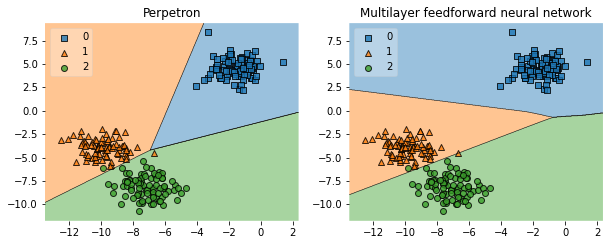

In [34]:
blobs_classifiers2=plot_decision(X_blobs_test,y_blobs_test, clfs2,labels2)

Accuracy Model 1: 99.6 %
Accuracy Model 2: 99.86666666666667 %
Chi Squared : 0.5


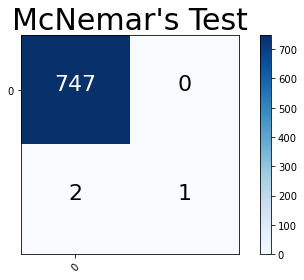

In [35]:
y_blobs_perpetron=blobs_classifiers2[0].predict(X_blobs_val)
y_blobs_MLPC=blobs_classifiers2[1].predict(X_blobs_val)
plot_mcnamer_table(y_blobs_val,y_blobs_perpetron,y_blobs_MLPC)

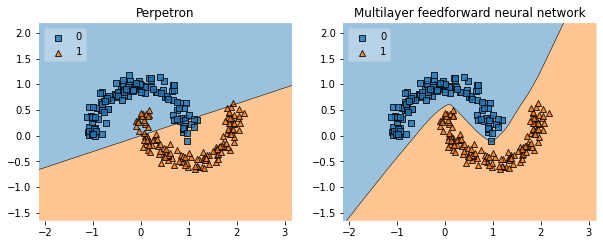

In [36]:
moons_classifiers2=plot_decision(X_moons_test,y_moons_test, clfs2,labels2)

Accuracy Model 1: 86.93333333333332 %
Accuracy Model 2: 99.06666666666666 %
Chi Squared : 89.01098901098901


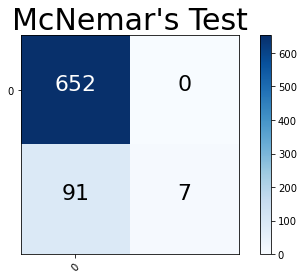

In [37]:
y_moons_perpetron=moons_classifiers2[0].predict(X_moons_val)
y_moons_MLPC=moons_classifiers2[1].predict(X_moons_val)
plot_mcnamer_table(y_moons_val,y_moons_perpetron,y_moons_MLPC)

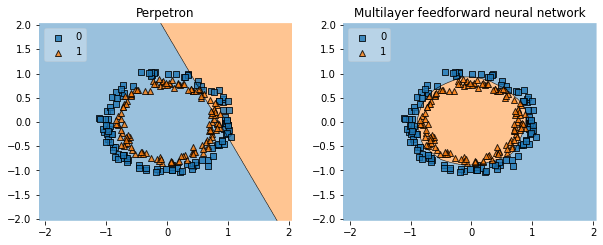

In [38]:
circles_classifiers2=plot_decision(X_circles_test,y_circles_test, clfs2,labels2)

Accuracy Model 1: 43.86666666666667 %
Accuracy Model 2: 96.13333333333334 %
Chi Squared : 364.002380952381


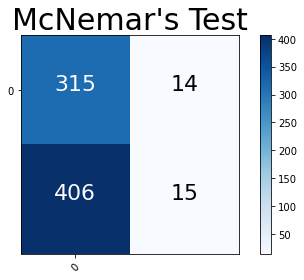

In [39]:
y_circles_perpetron=circles_classifiers2[0].predict(X_circles_val)
y_circles_MLPC=circles_classifiers2[1].predict(X_circles_val)
plot_mcnamer_table(y_circles_val,y_circles_perpetron,y_circles_MLPC)